
### Author: *_Wajid Sain_*

## The Spark Foundation Internship

## Task 05: Exploratory Data Analysis (Sports) - Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’. 
## As a sports analysts, find out the most successful teams, players and factors contributing to win or loss of a team.

### Importing Necessary Libraries  

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset

In [2]:
df = pd.read_csv('matches.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# check for null values
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
# dropping the umpire columns to get rid of null values
df = df.drop(['umpire3'],axis=1)

In [6]:
#the total no of rows and columns
print('The Total no of rows and columns in matches dataset is', df.shape)

The Total no of rows and columns in matches dataset is (756, 17)


#### Total matches played = 756

In [7]:
len(df['season'].unique())

12

#### Total seasons played = 12

In [8]:
pd.concat([df['team1'],df['team2']]).unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### Total Teams = 15

### Winning Teams

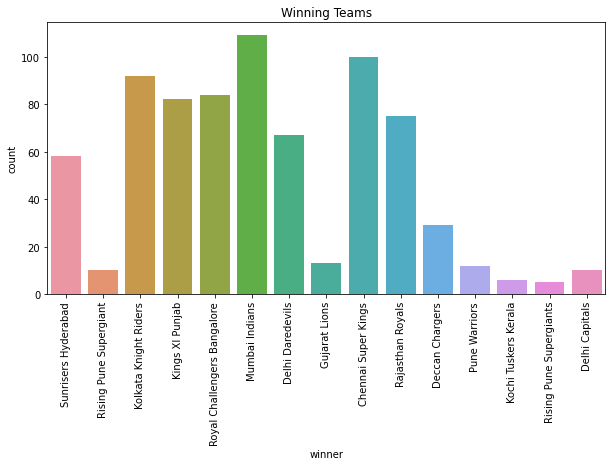

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'winner', data = df)
plt.title('Winning Teams')
plt.xticks(rotation = 90);

### Win by runs

C:\Users\Mack\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winner', ylabel='win_by_runs'>

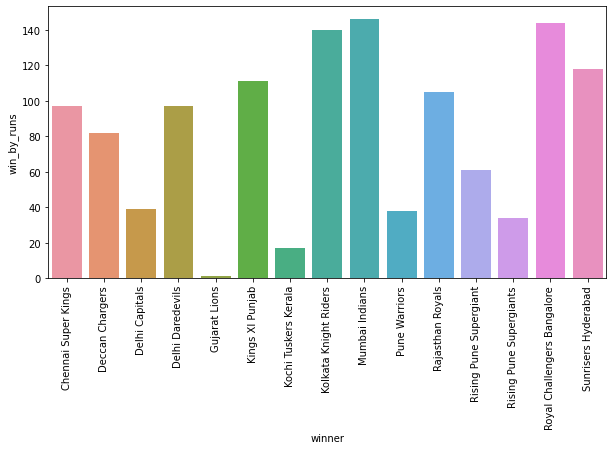

In [10]:
win_max = df.groupby(['winner'],as_index=False)['win_by_runs'].max()
plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(win_max['winner'],win_max['win_by_runs'])

#### The above graphs clearly shows Mumbai Indians is the team with most wins.

### Man of the Match Winners

In [11]:
df['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'AB de Villiers'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'MS Dhoni'),
  Text(4, 0, 'DA Warner'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'SK Raina'),
  Text(8, 0, 'G Gambhir'),
  Text(9, 0, 'MEK Hussey')])

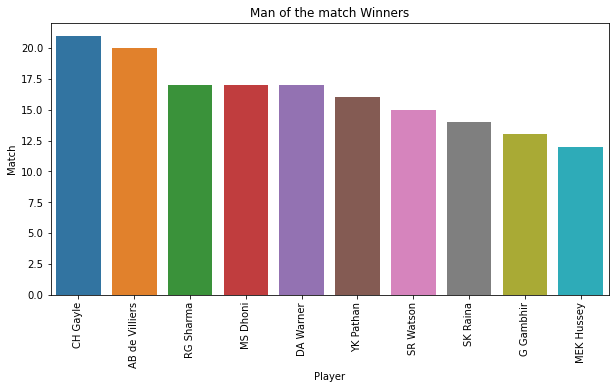

In [12]:
plt.figure(figsize = (10,5))
sns.barplot(x= df.player_of_match.value_counts()[:10].index, y= df.player_of_match.value_counts()[:10])
plt.title('Man of the match Winners')
plt.xlabel('Player')
plt.ylabel('Match')
plt.xticks(rotation = 90)

#### Chris Gayle and Ab de Villers are the best players.

### Number of matches in each season

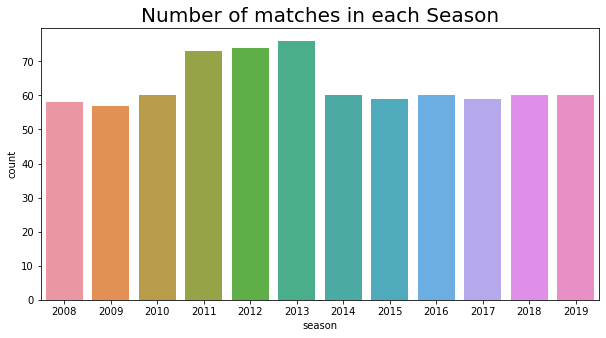

In [13]:
plt.subplots(figsize=(10,5))
sns.countplot(x = df['season'].sort_values())
plt.title('Number of matches in each Season', fontsize = 20)
plt.show()

### Toss winners

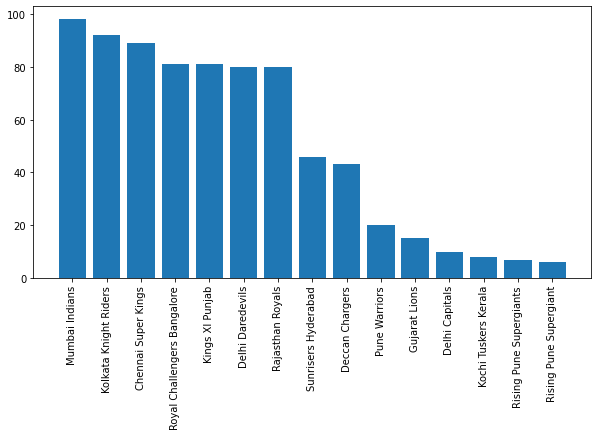

In [14]:
plt.figure(figsize=(10,5))
plt.bar(list(df['toss_winner'].value_counts().keys()),list(df['toss_winner'].value_counts()))
plt.xticks(rotation = 90)
plt.show()

### Comparing the Toss Decisions

C:\Users\Mack\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


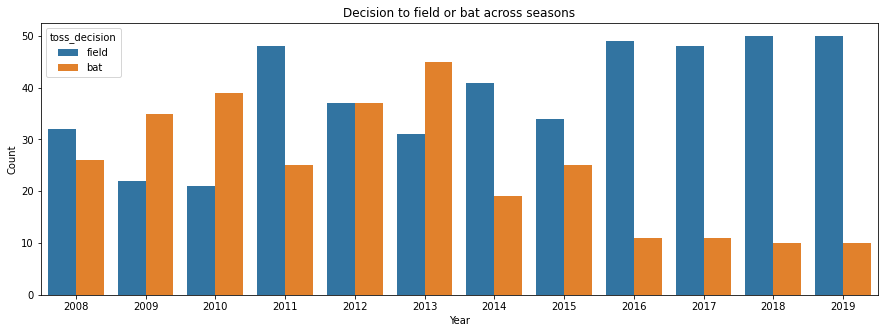

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(df['season'].sort_values(), hue = df['toss_decision'])
plt.title("Decision to field or bat across seasons")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

### When a team wins after batting on first position

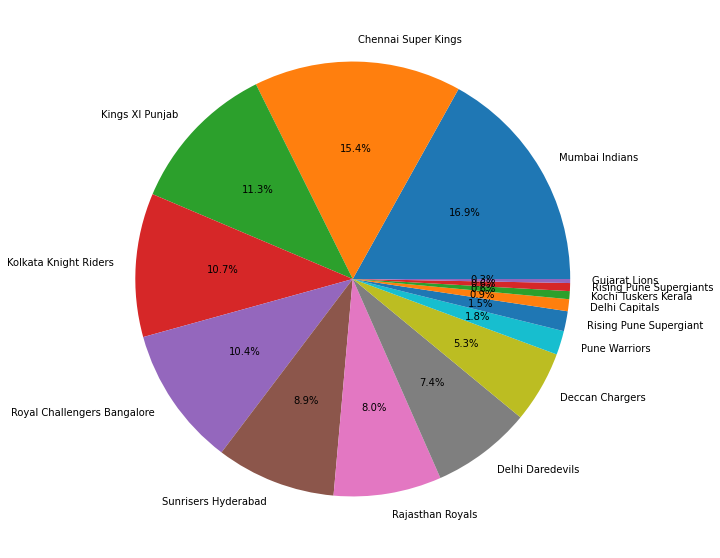

In [16]:
batting_first = df[df['win_by_runs']!=0]
plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys())
        ,autopct='%0.1f%%')
plt.show()

### When a team wins after batting on second position

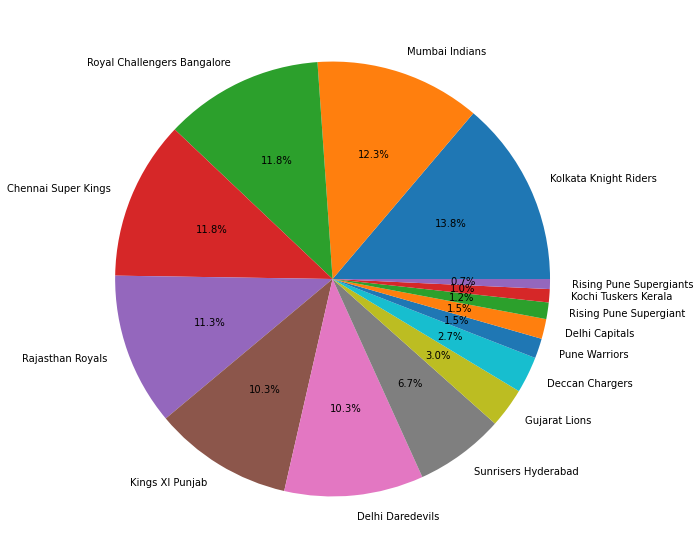

In [17]:
batting_second = df[df['win_by_wickets']!=0]
plt.figure(figsize = (10,10))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys())
        ,autopct = '%0.1f%%')
plt.show()

## Match Venues

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'Eden Gardens'),
  Text(1, 0, 'M Chinnaswamy Stadium'),
  Text(2, 0, 'Wankhede Stadium'),
  Text(3, 0, 'Feroz Shah Kotla'),
  Text(4, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(5, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(6, 0, 'Sawai Mansingh Stadium'),
  Text(7, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(8, 0, 'Maharashtra Cricket Association Stadium'),
  Text(9, 0, 'Subrata Roy Sahara Stadium'),
  Text(10, 0, 'Dr DY Patil Sports Academy'),
  Text(11, 0, 'Kingsmead'),
  Text(12, 0, 'Punjab Cricket Association IS Bindra Stadium, Mohali'),
  Text(13, 0, 'SuperSport Park'),
  Text(14, 0, 'Sardar Patel Stadium, Motera'),
  Text(15, 0, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'),
  Text(16, 0, 'Brabourne Stadium'),
  Text(17, 0, 'Saurashtra Cricket

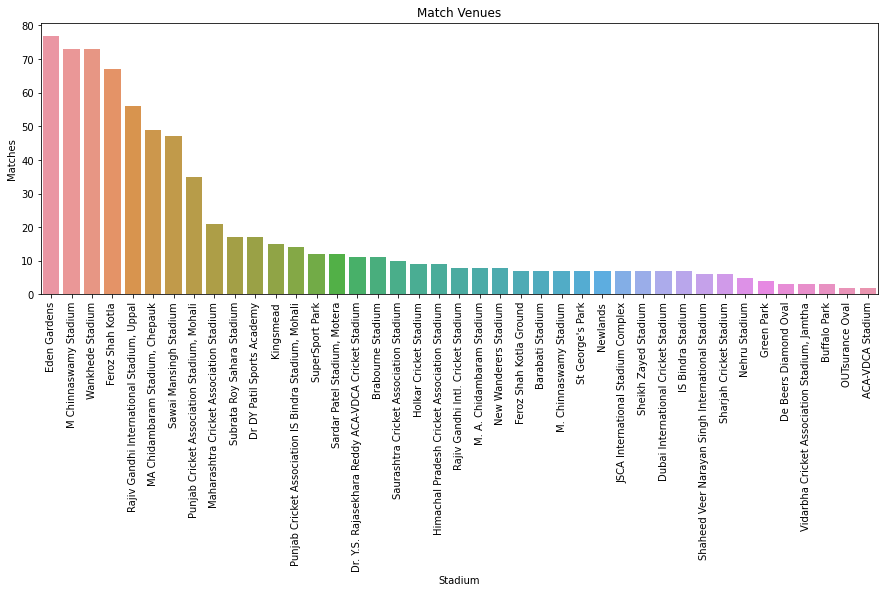

In [18]:
plt.subplots(figsize=(15,5))
sns.countplot(x ='venue',data = df,order = df['venue'].value_counts().index)
plt.title('Match Venues')
plt.xlabel('Stadium')
plt.ylabel('Matches')
plt.xticks(rotation = 90)

#### Eden Garden is the most popular venue

### Analysis of deliveries dataset

In [19]:
deli = pd.read_csv('deliveries.csv')


In [20]:
print('The Total no of rows and columns in deliveries dataset is ', deli.shape)

The Total no of rows and columns in deliveries dataset is  (136598, 21)


In [21]:
# Total matches where Super over was and wasn't played
deli['is_super_over'].value_counts()

0    136530
1        68
Name: is_super_over, dtype: int64

In [22]:
# total overall runs given by Extra
sum(deli['extra_runs'])

9519

In [23]:
# Total runs given by no balls
sum(deli['noball_runs'])

612

In [24]:
# Total runs given by penalty
sum(deli['penalty_runs'])

10

In [25]:
# Total soft-dissmisal of players over the years
sum(deli['player_dismissed'].value_counts())

6727

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'bowled'),
  Text(2, 0, 'run out'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'retired hurt'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'caught and bowled'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

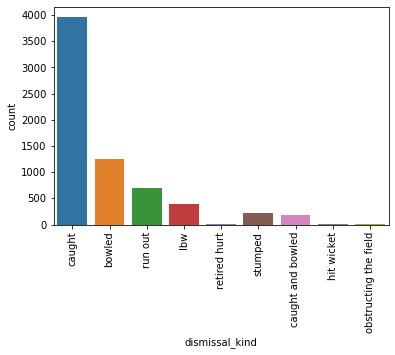

In [26]:
# kinds of dismissal
sns.countplot(x = deli['dismissal_kind'], data = deli)
plt.xticks(rotation = 90)

## Conclusion:

#### 1. Most successful Teams : Mumbai Indians and Chennai Super Kings 
#### 2. Best players to bid for: Chris Gayle and Ab de Villers.
#### 3. There are many factors on which the win depends: winning a toss, opt field or bat etc.